In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




In [2]:
#load data
titanic = sns.load_dataset('titanic')
#print the first 10 rows
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [3]:
#count the number of rows and columns
titanic.shape


(891, 15)

In [4]:
#doing the statistical operations
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


-- the max age is 80 yrs

In [5]:
#get a count of number of survivors
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


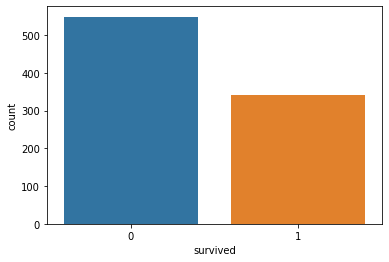

In [6]:
#visualize the count of surviors
sns.countplot(titanic['survived'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


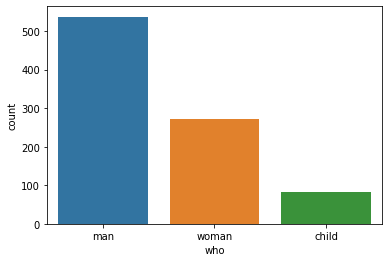

In [7]:
#visualize the count of survivors for colums 'who','sex', 'pclass','sibsp','embarked'
sns.countplot(titanic['who'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


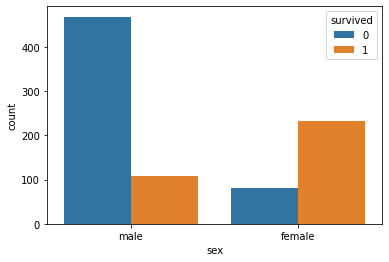

In [8]:
sns.countplot(titanic['sex'], hue = titanic['survived'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


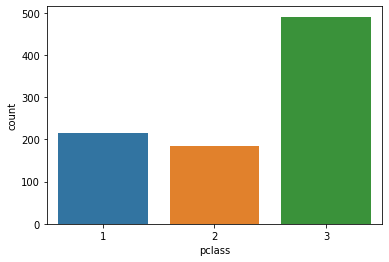

In [9]:
sns.countplot(titanic['pclass'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


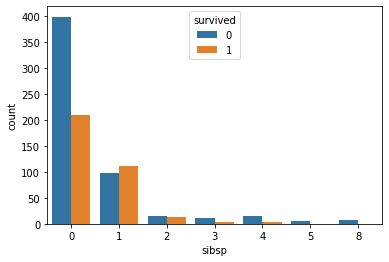

In [10]:
sns.countplot(titanic['sibsp'], hue = titanic['survived'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


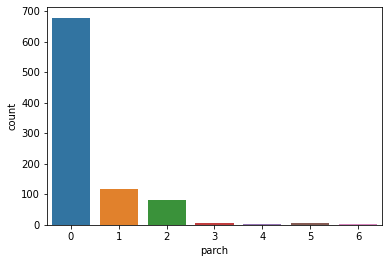

In [11]:
sns.countplot(titanic['parch'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


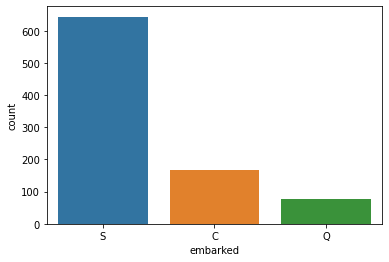

In [12]:
sns.countplot(titanic['embarked'])

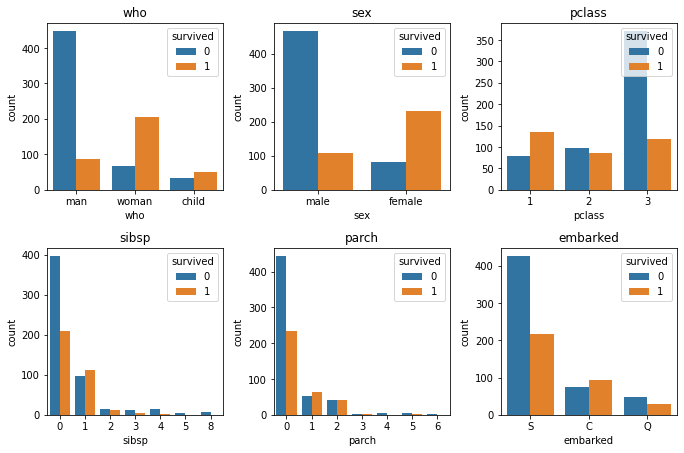

In [13]:
import warnings
warnings.filterwarnings('ignore')
cols = ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']
#the rows multiplied by columns should totally give 6 as we need to look ta 6 parameters
n_rows = 2
n_cols = 3
#the subplot grid and figure size of each graph
#plt.subplot method returns figure and axes
fig, axs  = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.2, n_rows * 3.2))

for r in range(0, n_rows):
  for c in range(0, n_cols):

    i = r*n_cols + c # the index to go throgh the number of columns
    ax =axs[r][c]
    sns.countplot(titanic[cols[i]], hue = titanic['survived'], ax=ax)
    ax.set_title(cols[i])
    ax.legend(title='survived', loc = 'upper right')

plt.tight_layout()

In [14]:
#look at the survival rate by sex
titanic.groupby('sex')[['survived']].mean()
#this says if you are female survival rate i svery high

,survived
sex,
female,0.742038
male,0.188908


In [15]:
#look at survival rate by sex and class
titanic.pivot_table('survived', index = 'sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


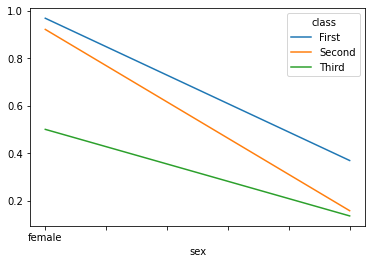

In [16]:
#survival rate by sex and class visually
titanic.pivot_table('survived', index = 'sex', columns='class').plot()

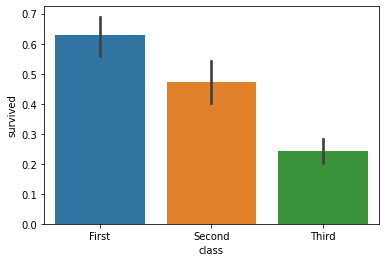

In [17]:
#plot the survival rate of each class
sns.barplot(x='class', y='survived', data =titanic)

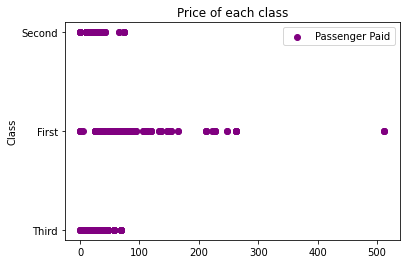

In [18]:
#plot the prices paid of each class
plt.scatter(titanic['fare'], titanic['class'], color = 'purple', label='Passenger Paid')
plt.ylabel('Class')
plt.title('Price of each class')
plt.legend()
plt.show()

In [19]:
#count the empty values in each column
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [20]:
#look at all of the values in each column & get a count
for val in titanic:
  print(titanic[val].value_counts())
  print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In [21]:
#drop the columns,
titanic = titanic.drop(['deck','embark_town', 'alive', 'class', 'who',  'alone', 'adult_male'], axis=1)
#remove rows with missing values
titanic = titanic.dropna(subset=['embarked', 'age'])

In [22]:
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [23]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#encode the sex column
titanic.iloc[:,2] = labelencoder.fit_transform(titanic.iloc[:, 2].values)

#encode the embarked column
titanic.iloc[:,7] = labelencoder.fit_transform(titanic.iloc[:, 7].values)


In [24]:
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


In [25]:
#split the data into independent 'X' and dependent 'Y' variables
X = titanic.iloc[:, 1:8].values
Y = titanic.iloc[:,0].values


In [26]:
#split the dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state =0)


In [27]:
#scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [28]:
def models(X_train, Y_train):

  #use logistic regression 
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)

  #Use KNeighbors

  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
  knn.fit(X_train, Y_train)

  #Use SVC(li near kernel)
  from sklearn.svm import SVC 
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)
    #Use SVC(RBF kernel)
  from sklearn.svm import SVC 
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #use gaussianNB
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using Descision Tree 
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion ='entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #use the randomforest classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion='entropy', random_state =0)
  forest.fit(X_train, Y_train)
  #pritn training accuracy for each model
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train,Y_train))
  print('[1]K Neighbors Training Accuracy:', knn.score(X_train,Y_train))
  print('[2]SVC Linear Training Accuracy:', svc_lin.score(X_train,Y_train))
  print('[3]SVC RBF kernel Training Accuracy:', svc_rbf.score(X_train,Y_train))
  print('[4]Gaussian Training Accuracy:', gauss.score(X_train,Y_train))
  print('[5]Descision Tree Training Accuracy:', tree.score(X_train,Y_train))
  print('[6]Random Forest Training Accuracy:', forest.score(X_train,Y_train))
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest



In [29]:
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy: 0.8031634446397188
[1]K Neighbors Training Accuracy: 0.789103690685413
[2]SVC Linear Training Accuracy: 0.7768014059753954
[3]SVC RBF kernel Training Accuracy: 0.6854130052724078
[4]Gaussian Training Accuracy: 0.8031634446397188
[5]Descision Tree Training Accuracy: 0.9929701230228472
[6]Random Forest Training Accuracy: 0.9753954305799648


In [30]:
#show the confusion matrix and accuracy for all of teh models on the test data
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  #extract true negative, false positive, fals eneg, true positive
  TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()

  test_score = (TP+TN)/(TP+TN+FN+FP)
  print(cm)
  print('Model[{}] Testing Accuracy = "{}"'.format(i,test_score ))
  print()

[[74  8]
 [18 43]]
Model[0] Testing Accuracy = "0.8181818181818182"

[[64 18]
 [30 31]]
Model[1] Testing Accuracy = "0.6643356643356644"

[[70 12]
 [18 43]]
Model[2] Testing Accuracy = "0.7902097902097902"

[[75  7]
 [45 16]]
Model[3] Testing Accuracy = "0.6363636363636364"

[[69 13]
 [23 38]]
Model[4] Testing Accuracy = "0.7482517482517482"

[[60 22]
 [10 51]]
Model[5] Testing Accuracy = "0.7762237762237763"

[[67 15]
 [13 48]]
Model[6] Testing Accuracy = "0.8041958041958042"



In [31]:
#get feature importances
forest = model[6]
importances = pd.DataFrame({'feature': titanic.iloc[:,1:8].columns, 'importance':np.round(forest.feature_importances_, 3)})
importances= importances.sort_values('importance', ascending= False).set_index('feature')
importances

,importance
feature,
age,0.300
fare,0.296
sex,0.183
pclass,0.098
sibsp,0.050
parch,0.044
embarked,0.030


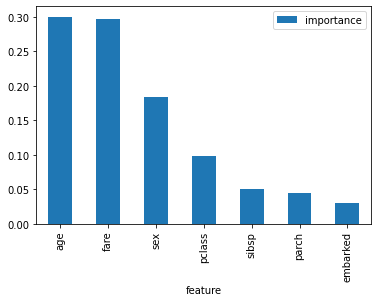

In [32]:
importances.plot.bar()

In [33]:
#print the prediction of the linear regression
pred = model[0].predict(X_test)
print(pred)

print()

#print the actual values
print(Y_test)

[0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1
 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [34]:

my_survival=[[1,0,3,1,6, 300, 1]]
from sklearn.preprocessing import StandardScaler 
sc= StandardScaler()
my_survival_scaled = sc.fit_transform(my_survival)
#print prediction
pred = model[6].predict(my_survival_scaled)
print(pred)

if pred==0:
  print("oh no! you didnt make it")
else:
  print('nice! You survived')


[1]
nice! You survived
